<a href="https://colab.research.google.com/github/tarunpanda001/EDA/blob/main/BusinessCaseStudy_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Project Objective

In this project, our aim is to help **Netflix** make smarter decisions by answering two key questions:

- What kind of content performs better — **Movies** or **TV Shows**?
- How can Netflix expand more effectively in different **countries**?

To answer these, we’ll dive into Netflix’s dataset and uncover meaningful patterns and trends.

We'll begin with a quick overview of the data — checking how it's structured, how many rows and columns it contains, and the types of information available. This initial understanding sets the foundation for deeper analysis and eventually leads to **actionable business insights**.

By the end, we aim to provide Netflix with **data-backed recommendations** to guide content creation and global growth.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


2. Basic shape of the dataset

In [ ]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (8807, 12)


 Data types of each column


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Summary statistics for numerical and object columns

In [ ]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Check for missing values

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 3. Non-Graphical Analysis

In this step, we will:
- Count the number of movies vs TV shows
- Find the most common content ratings
- Identify the most popular genres and countries
- Count unique values in columns like Director, Cast, and Country

This gives us a general overview of the dataset before visualizing it.


In [ ]:
# Count of Movies vs TV Shows
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
#Proportion ratio of Movie vs Tv Show
df["type"].value_counts(normalize=True)*100

,proportion
type,
Movie,69.615079
TV Show,30.384921


## Preprocessing: Splitting Multi-valued Columns

Some columns like 'Listed_in' (Genres), and 'Duration' have multiple values in a single cell separated by commas.

To analyze them effectively:
- We will split them into separate rows or lists
- Strip whitespace
- Create helper columns for analysis


In [ ]:
a=df["listed_in"].apply(lambda x : x.split(", ")).tolist()
title_genre=pd.DataFrame(a, index = df['title']).stack().reset_index().drop(columns = 'level_1')
title_genre.columns=["title","genre"]
title_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
title_genre["genre"].value_counts().head()

,count
genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869


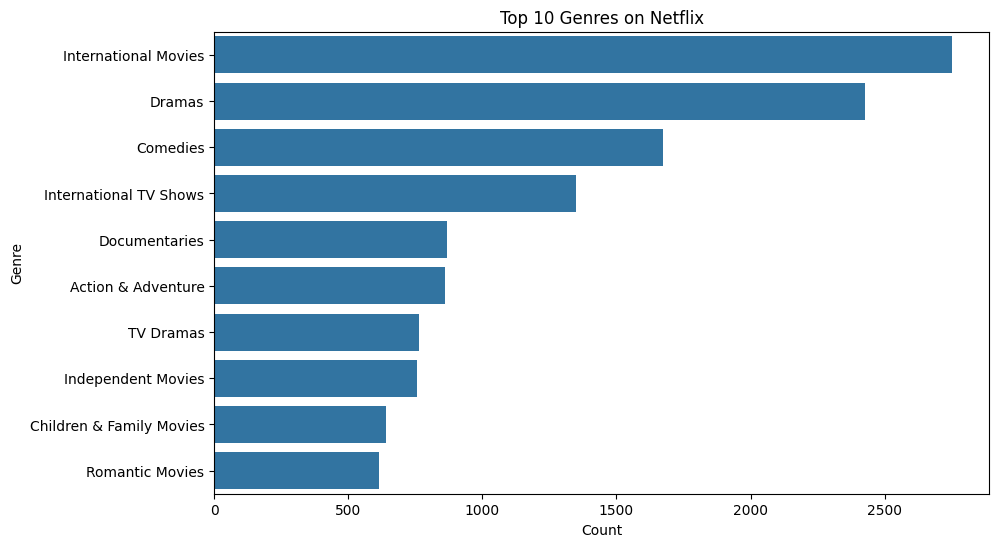

In [ ]:
# Visualize the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts.head(10), x='count', y='genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Genres on Netflix')
plt.show()

### 📌 Insights: Top 10 Genres on Netflix

- **Dramas** are by far the most common genre on Netflix, indicating high viewer demand and strong global storytelling appeal.
-  **Comedies** ranking next, suggesting that light, humorous content also performs well across regions and cultures.
- **Documentaries** and **Action & Adventure** follow closely, highlighting viewer interest in both real-life stories and high-energy content.
- Genres like **International**, **Children & Family**, and **Romantic** content also appear in the top 10, reflecting Netflix’s global and diverse audience base.
- The inclusion of **International TV Shows** shows Netflix’s strategic investment in non-English content to expand globally.
- Netflix should continue producing **Drama and Comedy** as safe bets, while also scaling **Documentaries and International content** based on regional preferences and success rates.


## Checking for Missing Values in 'Duration' Column

We will now check how many entries are missing in the 'Duration' column, which may affect our analysis for Movie length or TV Show seasons.


In [ ]:
df["duration"].isna().sum()

np.int64(3)

### Missing Values in 'Duration'

We found 3 missing values in the `Duration` column. These entries will be removed from the dataset, as `Duration` is essential for analyzing content length (e.g., movie duration or number of seasons in TV shows).


In [ ]:
# Display rows where Duration is missing
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### Data Issue Detected: Duration Values in Rating Column

During inspection, we found that some rows in the `Rating` column contain values like "90 min" or "1 Season", which clearly belong in the `Duration` column.

This might have happened due to missing values or misaligned columns in the dataset. We will now remove such incorrect rows to ensure clean analysis.


In [ ]:
df["rating"].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


### Fixing Invalid Duration Entries

Only three rows have missing or misaligned values that caused duration data to appear in the Rating column. We will drop these rows using `dropna()` to ensure clean and accurate analysis.


In [ ]:
# Drop rows where any key column is missing (especially Duration or Rating)
df = df.dropna(subset=['rating', 'duration']).reset_index(drop=True)

In [ ]:
# Confirm 'Rating' column is now clean
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

### Creating Duration Columns for Movies and TV Shows

We will now create two separate numeric columns:
- `Movie_len`: Extracts the duration in minutes for Movies
- `Num_seasons`: Extracts the number of seasons for TV Shows


In [ ]:
df["Movie_len"]=df[df["type"]=="Movie"]["duration"].apply(lambda x : int(x.split()[0]))
df["No of Seasons"]=df[df["type"]=="TV Show"]["duration"].apply(lambda x : int(x.split()[0]))
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie_len,No of Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,NaN
8796,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,2.0
8797,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,NaN
8798,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,NaN


### Movie Length Distribution

We’ll plot the distribution of movie durations using a histogram and a boxplot to understand typical lengths and detect any outliers.


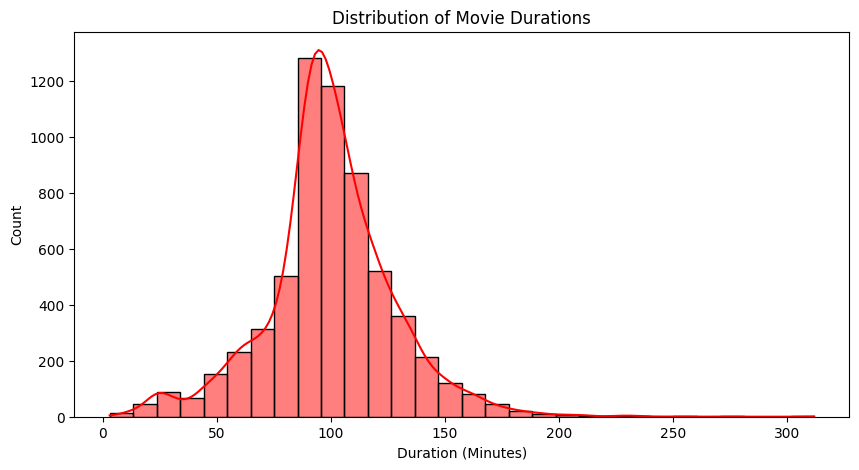

In [ ]:
# Histogram
movies = df[df['type'] == 'Movie']
plt.figure(figsize=(10,5))
sns.histplot(movies['Movie_len'], bins=30, kde=True, color='red')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()


### 📌 Insights: Movie Duration

- Most Netflix movies fall within the **80 to 110 minutes** range.
- There is a sharp peak around **90 minutes**, indicating this is a popular or preferred duration.
- Very few movies go beyond **150 minutes**, and those that do may be special releases or documentaries.
- This suggests that Netflix should focus on producing movies that are **90–110 minutes long** for better engagement and completion rates.


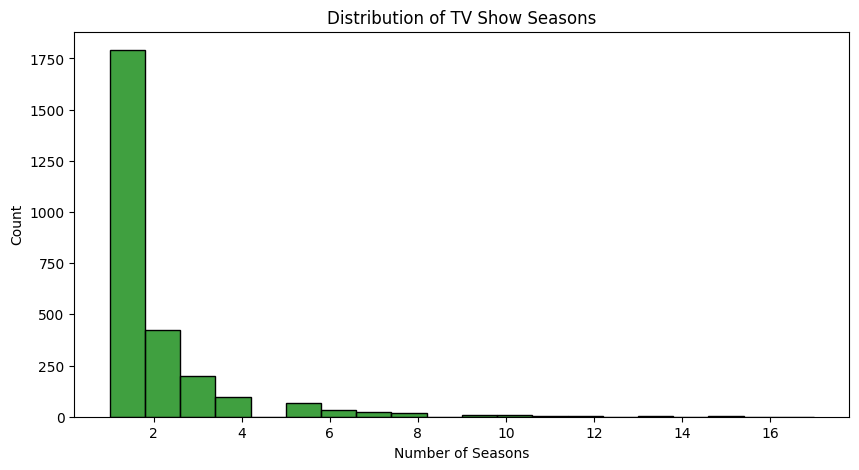

In [ ]:
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show']

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(tv_shows['No of Seasons'], bins=20, kde=False, color='green')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

### 📌 Insights: Number of Seasons in TV Shows

- A large majority of Netflix TV shows have just **1 season**, suggesting they are either miniseries or pilot/test content.
- Very few shows go beyond **3 or 4 seasons**.
- This could mean:
  - Netflix tests a concept with one season and renews based on performance.
  - Users prefer **shorter, binge-able** series.
- Recommendation: Netflix should continue producing **1–2 season shows** that are high-impact and globally appealing, and only extend if performance data supports it.


## 📈 Content Trend Over the Years

We will analyze how the production and addition of content (Movies vs TV Shows) has changed over time, with a special focus on post-2015 growth.

This can help Netflix decide which type of content to invest more in for the future.


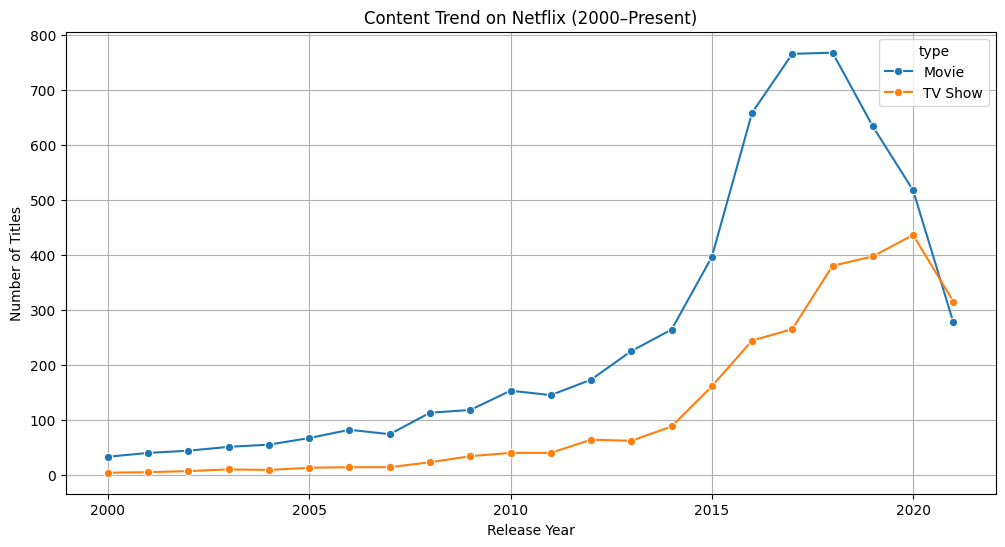

In [ ]:
# Group by Release Year and Type (Movie/TV Show)
content_trend = df.groupby(['release_year', 'type']).size().reset_index(name='Count')

# Filter years >= 2000 for clarity
content_trend = content_trend[content_trend['release_year'] >= 2000]

# Line plot to show trends
plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='release_year', y='Count', hue='type', marker='o')
plt.title('Content Trend on Netflix (2000–Present)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


### 📌 Insights: Growth of Movies vs TV Shows Over Time

- **Before 2015**, Movies dominated Netflix’s content library.
- After **2015**, there is a noticeable **rise in TV Show releases**, showing a shift in Netflix’s strategy toward serial content.
- The peak for TV Show additions occurred around **2018–2020**, aligning with Netflix's global expansion and demand for binge-worthy shows.
- Post-2020, both content types slightly declined, possibly due to pandemic-related production delays.
- Netflix may continue prioritizing **high-quality, short-length series** given the rising trend in viewer engagement and platform binge behavior.


## 🌍 Country-wise Content Analysis

We analyze which countries contribute most content to Netflix, helping us understand global content distribution and potential markets for expansion.


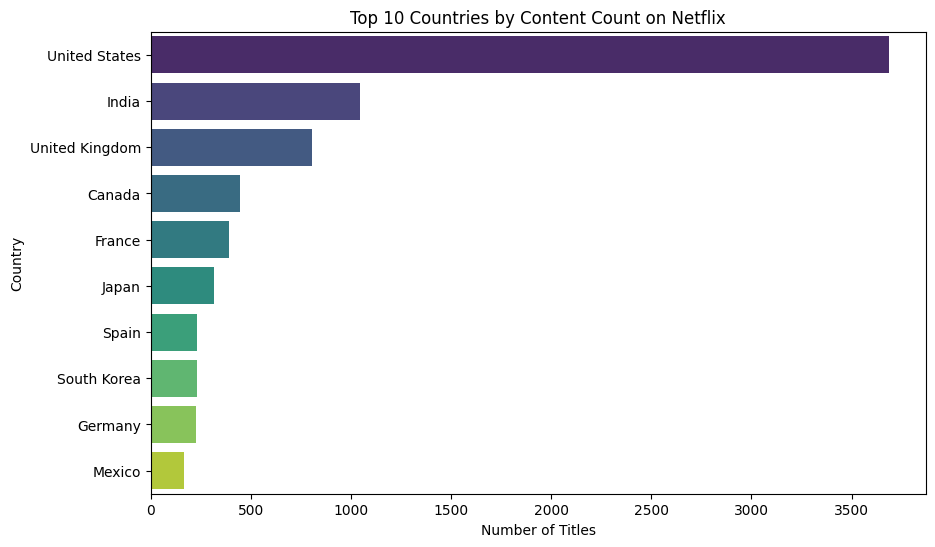

In [ ]:
# Preprocess Country column
df_country = df[['country','type']].dropna()
df_country['country'] = df_country['country'].str.split(', ')
df_country = df_country.explode('country')

# Top 10 countries overall
top_countries = df_country['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Content Count on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


### 📌 Insights: Country-Wise Contribution

- **United States** dominates content production on Netflix.
- Other key contributors include **India**, **United Kingdom**, **Canada**, and **Japan**.
- The presence of **India** and **Japan** in the top countries highlights the importance of **regional markets and language content**.
- Netflix should focus on expanding content partnerships in these high-output countries and further localizing content.


## 🎬 Top 10 Most Frequent Actors and Directors

We analyze the most commonly featured actors and directors on Netflix. This helps identify popular talent and collaboration trends that Netflix might want to leverage more.


/tmp/ipython-input-173-705668380.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='rocket')


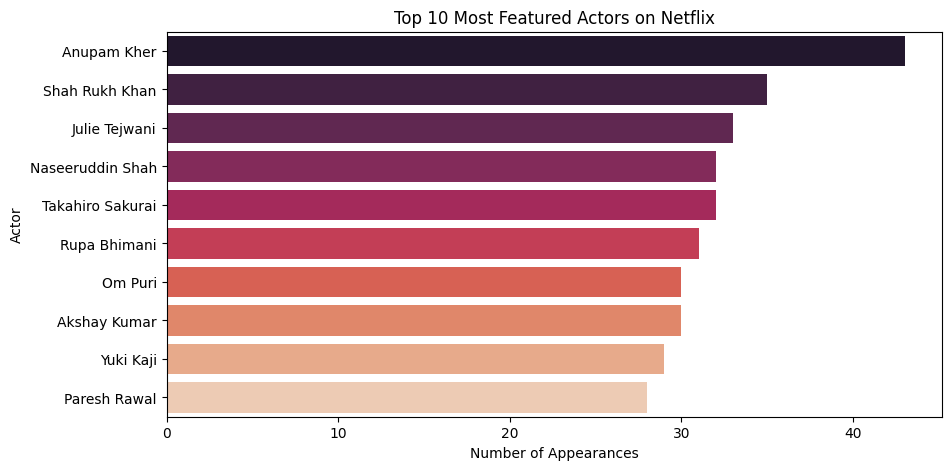

In [ ]:
# --- Top Actors ---
df_cast = df[['cast']].dropna()
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')
df_cast['cast'] = df_cast['cast'].str.strip()

top_actors = df_cast['cast'].value_counts().head(10)

# Plot top actors
plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='rocket')
plt.title("Top 10 Most Featured Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.show()


### 📌 Insights: Top Talent

- These actors are featured most frequently in Netflix content.
- Their popularity and reliability likely drive viewer engagement.
- Netflix could continue collaborating with these top talents for future projects.


## 🔞 Rating Distribution by Content Type

We analyze how Netflix’s content is distributed across different content ratings (e.g., TV-MA, PG) for both Movies and TV Shows.


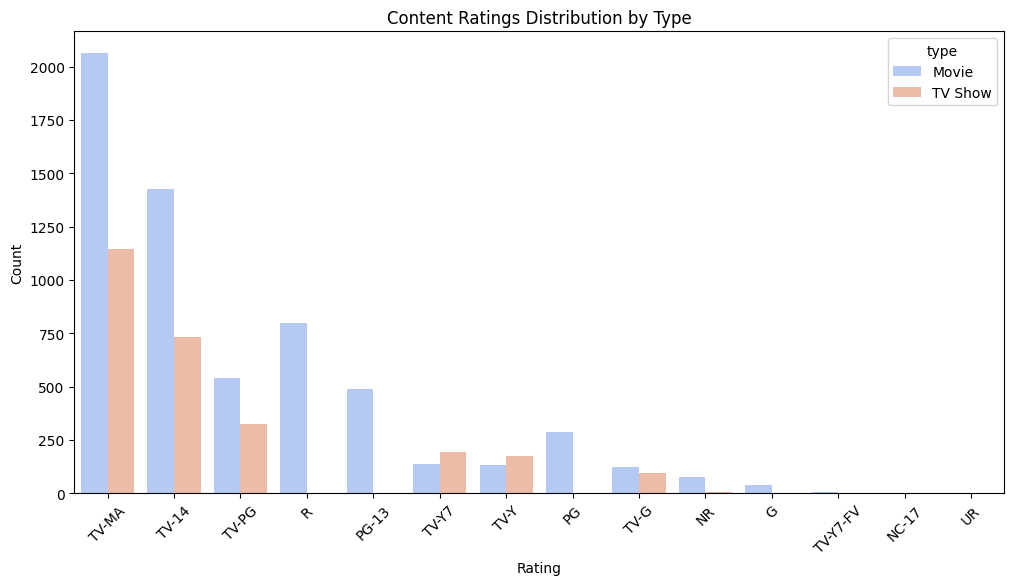

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Content Ratings Distribution by Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### 📌 Insights: Rating Trends

- TV Shows on Netflix are more frequently rated **TV-MA** and **TV-14**, suggesting more mature or edgy content.
- Movies tend to span a wider range of ratings including **PG, PG-13, and R**.
- This aligns with Netflix’s strategy of targeting both **adult binge-watchers** and **family-friendly movie content**.


## ✅ Final Business Recommendations

Based on our data-driven analysis of Netflix’s content:

🔹 **Focus More on TV Shows**  
There has been a clear surge in TV Show production since 2015, with viewers preferring shorter, binge-worthy series.

🔹 **Stick to Popular Genres**  
Genres like **Drama**, **Comedy**, and **Documentary** consistently rank at the top. Netflix should continue investing in these while exploring **global content genres**.

🔹 **Optimize Movie Lengths**  
Most popular movies fall in the **80–110 minutes** range. Netflix should prioritize this sweet spot for better viewer retention.

🔹 **Leverage Top Talent**  
Actors and directors who appear frequently on the platform drive engagement. Continued collaboration with these creators is a smart strategy.

🔹 **Tailor Content for Regional Tastes**  
Country-wise genre preferences (e.g., action in the US, romance in India) should be used to localize future content.

🔹 **Release Strategically**  
More content is added in **July and December**—ideal months for launching new series/movies due to holiday engagement.

---

These insights can help Netflix refine its content production strategy, maximize user satisfaction, and improve global retention.
